<a href="https://colab.research.google.com/github/angiegh2002/nn/blob/main/lung_cancer_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!kaggle datasets download rm1000/lung-cancer-histopathological-images

Dataset URL: https://www.kaggle.com/datasets/rm1000/lung-cancer-histopathological-images
License(s): CC-BY-SA-4.0
 99% 1.54G/1.55G [00:16<00:00, 141MB/s]
100% 1.55G/1.55G [00:16<00:00, 98.8MB/s]


In [2]:
!unzip /content/lung-cancer-histopathological-images.zip -d data

Streaming output truncated to the last 5000 lines.
  inflating: data/squamous_cell_carcinoma/0000.jpg  
  inflating: data/squamous_cell_carcinoma/0001.jpg  
  inflating: data/squamous_cell_carcinoma/0002.jpg  
  inflating: data/squamous_cell_carcinoma/0003.jpg  
  inflating: data/squamous_cell_carcinoma/0004.jpg  
  inflating: data/squamous_cell_carcinoma/0005.jpg  
  inflating: data/squamous_cell_carcinoma/0006.jpg  
  inflating: data/squamous_cell_carcinoma/0007.jpg  
  inflating: data/squamous_cell_carcinoma/0008.jpg  
  inflating: data/squamous_cell_carcinoma/0009.jpg  
  inflating: data/squamous_cell_carcinoma/0010.jpg  
  inflating: data/squamous_cell_carcinoma/0011.jpg  
  inflating: data/squamous_cell_carcinoma/0012.jpg  
  inflating: data/squamous_cell_carcinoma/0013.jpg  
  inflating: data/squamous_cell_carcinoma/0014.jpg  
  inflating: data/squamous_cell_carcinoma/0015.jpg  
  inflating: data/squamous_cell_carcinoma/0016.jpg  
  inflating: data/squamous_cell_carcinoma/0017.j

In [3]:
!pip install tensorflow

In [4]:
!pip install talos

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.5/58.5 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 489.9/489.9 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 26.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 25.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.4/53.4 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 53.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 67.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 24.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.6/26.6 MB 30.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 38.3 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: 

In [17]:
import os
from glob import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense ,Flatten,Dropout
from tensorflow.keras.optimizers import Adamax, Adam, SGD, RMSprop
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from tensorflow.keras.losses import categorical_crossentropy, sparse_categorical_crossentropy
import talos


In [3]:
data_dir = "/content/data"
image_data = [
    {"image_path": image_file, "label": label}
    for label in os.listdir(data_dir)
    if os.path.isdir(os.path.join(data_dir, label))
    for image_file in glob(os.path.join(data_dir, label, "*.jpg"))
]

lung_df = pd.DataFrame(image_data)

In [4]:
lung_df.head()

,image_path,label
0,/content/data/adenocarcinoma/0257.jpg,adenocarcinoma
1,/content/data/adenocarcinoma/1332.jpg,adenocarcinoma
2,/content/data/adenocarcinoma/4450.jpg,adenocarcinoma
3,/content/data/adenocarcinoma/2297.jpg,adenocarcinoma
4,/content/data/adenocarcinoma/4554.jpg,adenocarcinoma


In [5]:
lung_df.describe()

,image_path,label
count,15000,15000
unique,15000,3
top,/content/data/adenocarcinoma/0257.jpg,adenocarcinoma
freq,1,5000


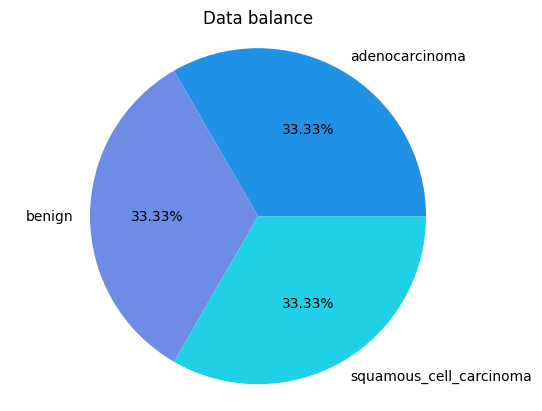

In [6]:
data_balance = lung_df.label.value_counts()
plt.pie(data_balance, labels = data_balance.index, autopct='%1.2f%%', colors = ["#2092E6","#6D8CE6","#20D0E6"])
plt.title("Data balance")
plt.axis("equal")
plt.show()

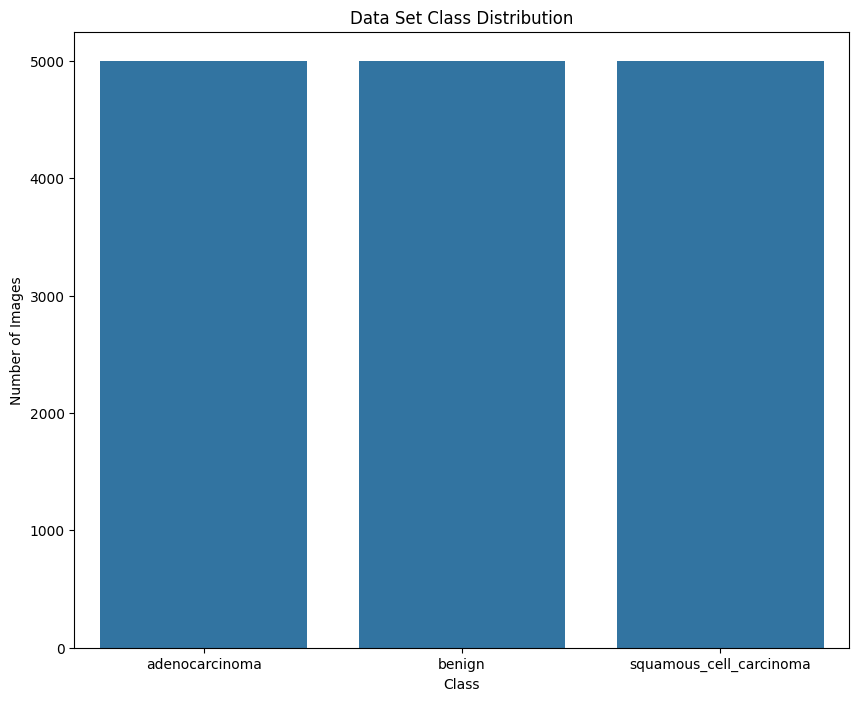

In [7]:
plt.subplots(figsize=(10,8))
sns.countplot(data=lung_df,x="label")
plt.title('Data Set Class Distribution')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.show()


In [8]:
# lung_key = {'adenocarcinoma' : 1, 'benign' : 0,'squamous_cell_carcinoma' : 2}

# lung_df['label'] = lung_df['label'].map(lung_key)
# lung_df.head(10)

In [9]:
train_df, ts_df = train_test_split(lung_df, train_size = 0.8, shuffle = True, random_state = 42)
valid_df, test_df = train_test_split(ts_df, train_size = 0.5, shuffle = True, random_state = 42)

In [10]:
batch_size = 32
img_size = (224, 224)
tr_gen = ImageDataGenerator(rescale=1. / 255)
ts_gen = ImageDataGenerator(rescale=1. / 255)

train_gen = tr_gen.flow_from_dataframe( train_df, x_col= 'image_path', y_col= 'label', target_size= img_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= True, batch_size= batch_size)

valid_gen = ts_gen.flow_from_dataframe( valid_df, x_col= 'image_path', y_col= 'label', target_size= img_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= True, batch_size= batch_size)

test_gen = ts_gen.flow_from_dataframe( test_df, x_col= 'image_path', y_col= 'label', target_size= img_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= False, batch_size= batch_size)

Found 12000 validated image filenames belonging to 3 classes.
Found 1500 validated image filenames belonging to 3 classes.
Found 1500 validated image filenames belonging to 3 classes.


In [11]:
def model_performance(history, Epochs):
    # Define needed variables
    tr_acc = history.history['accuracy']
    tr_loss = history.history['loss']
    val_acc = history.history['val_accuracy']
    val_loss = history.history['val_loss']

    Epochs = [i+1 for i in range(len(tr_acc))]

    # Plot training history
    plt.figure(figsize= (20, 8))
    plt.style.use('fivethirtyeight')
    plt.subplot(1, 2, 1)
    plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
    plt.plot(Epochs, val_loss, 'b', label= 'Validation loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
    plt.plot(Epochs, val_acc, 'b', label= 'Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout
    plt.show()

In [12]:
# create Model structure
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)
class_counts = len(list(train_gen.class_indices.keys()))     # to define number of classes in dense layer

In [ ]:
model = Sequential()
model.add(Input(shape=img_shape))
model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(class_counts, activation = 'softmax'))

model.compile(Adamax(learning_rate= 0.001),loss = 'categorical_crossentropy', metrics = ['accuracy'] )

history=model.fit(train_gen, epochs= 10, verbose= 1, validation_data= valid_gen, shuffle= False)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 65s 170ms/step - accuracy: 0.6345 - loss: 4.5809 - val_accuracy: 0.6027 - val_loss: 1.4868
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 56s 149ms/step - accuracy: 0.7107 - loss: 1.0660 - val_accuracy: 0.7733 - val_loss: 0.5770
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 58s 155ms/step - accuracy: 0.7350 - loss: 0.7553 - val_accuracy: 0.7867 - val_loss: 0.4929
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 57s 151ms/step - accuracy: 0.7456 - loss: 0.6192 - val_accuracy: 0.6707 - val_loss: 0.6838
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 55s 146ms/step - accuracy: 0.7431 - loss: 0.5575 - val_accuracy: 0.7287 - val_loss: 0.5239
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 55s 146ms/step - accuracy: 0.7500 - loss: 0.5282 - val_accuracy: 0.7560 - val_loss: 0.5451
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 56s 148ms/step - accuracy: 0.7507 - loss: 0.5075 - val_accuracy: 0.7533 - val_loss: 0.4684
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 55s 147ms/step - accuracy: 0.7650 - loss: 0

In [ ]:
loss, accuracy = model.evaluate(test_gen, verbose=0)
print(f'Model Accuracy : {round(accuracy*100)}%')
print(f'Model Loss : {round(loss*100)}%')

Model Accuracy : 77%
Model Loss : 45%


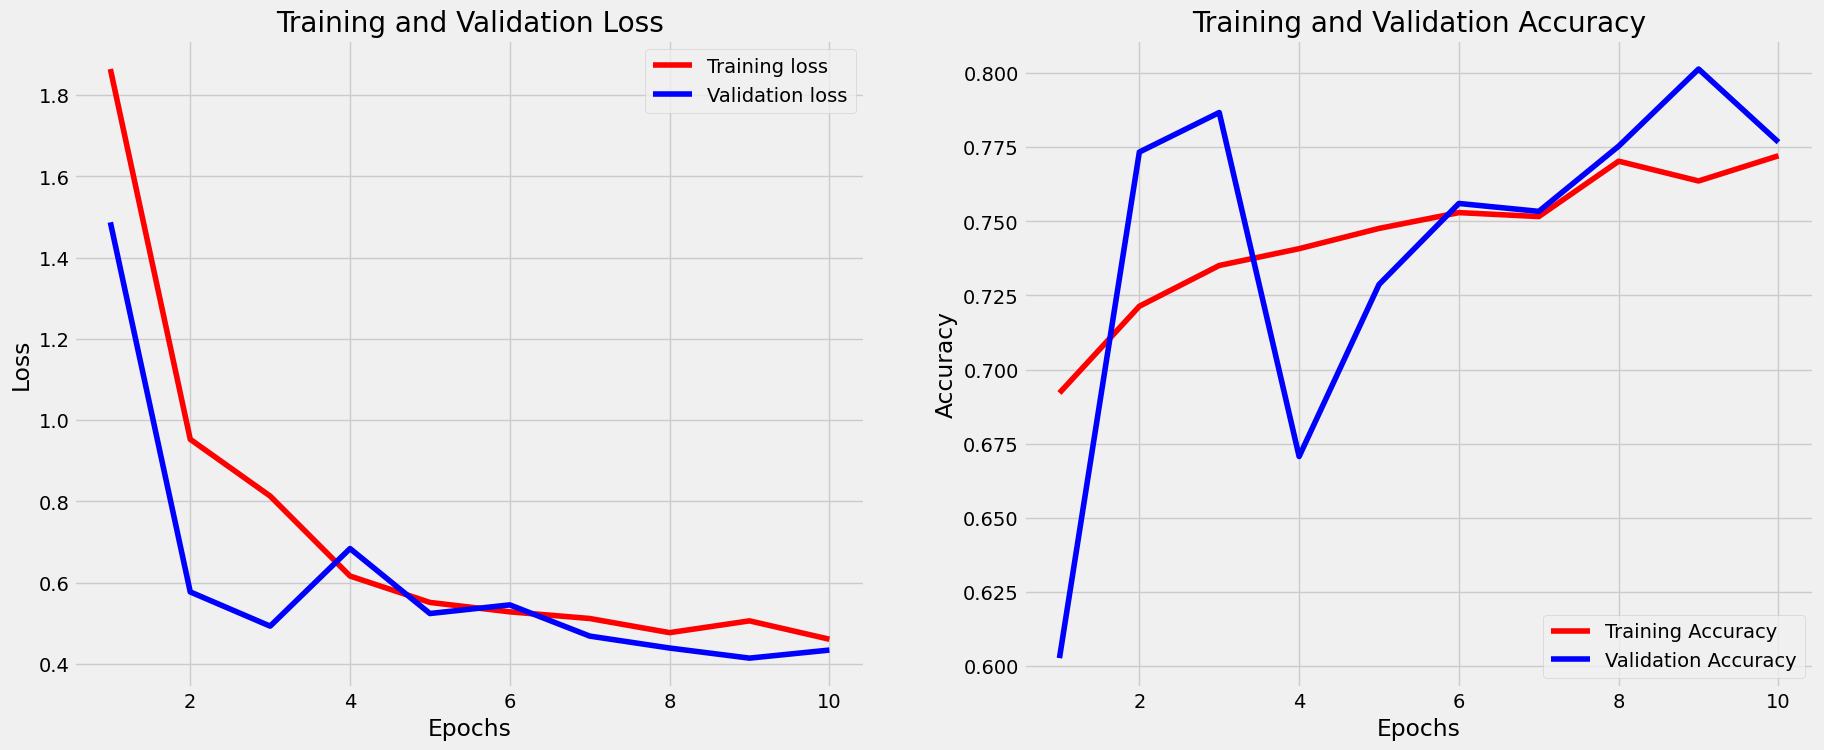

In [ ]:
model_performance(history, 10)

In [ ]:
model1 = Sequential()
model1.add(Input(shape=img_shape))
model1.add(Flatten())
model1.add(Dense(256, activation = 'relu'))
model1.add(Dense(128, activation = 'relu'))
model1.add(Dense(64, activation = 'relu'))
model1.add(Dense(32, activation = 'relu'))
model1.add(Dense(class_counts, activation = 'softmax'))

model1.compile(Adamax(learning_rate= 0.001),loss = 'categorical_crossentropy', metrics = ['accuracy'] )

history1=model1.fit(train_gen, epochs= 10, verbose= 1, validation_data= valid_gen, shuffle= False)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 62s 161ms/step - accuracy: 0.6402 - loss: 2.2466 - val_accuracy: 0.6300 - val_loss: 1.9429
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 56s 148ms/step - accuracy: 0.7028 - loss: 0.9694 - val_accuracy: 0.7667 - val_loss: 0.5026
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 59s 157ms/step - accuracy: 0.7222 - loss: 0.7960 - val_accuracy: 0.7200 - val_loss: 0.6091
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 59s 157ms/step - accuracy: 0.7525 - loss: 0.5619 - val_accuracy: 0.7860 - val_loss: 0.4436
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 56s 149ms/step - accuracy: 0.7516 - loss: 0.5603 - val_accuracy: 0.7193 - val_loss: 0.6867
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 58s 156ms/step - accuracy: 0.7447 - loss: 0.5668 - val_accuracy: 0.7980 - val_loss: 0.4238
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 56s 150ms/step - accuracy: 0.7631 - loss: 0.4803 - val_accuracy: 0.7973 - val_loss: 0.4153
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 56s 149ms/step - accuracy: 0.7657 - loss: 0

In [ ]:
loss, accuracy = model1.evaluate(test_gen, verbose=0)
print(f'Model Accuracy : {round(accuracy*100)}%')
print(f'Model Loss : {round(loss*100)}%')

Model Accuracy : 76%
Model Loss : 48%


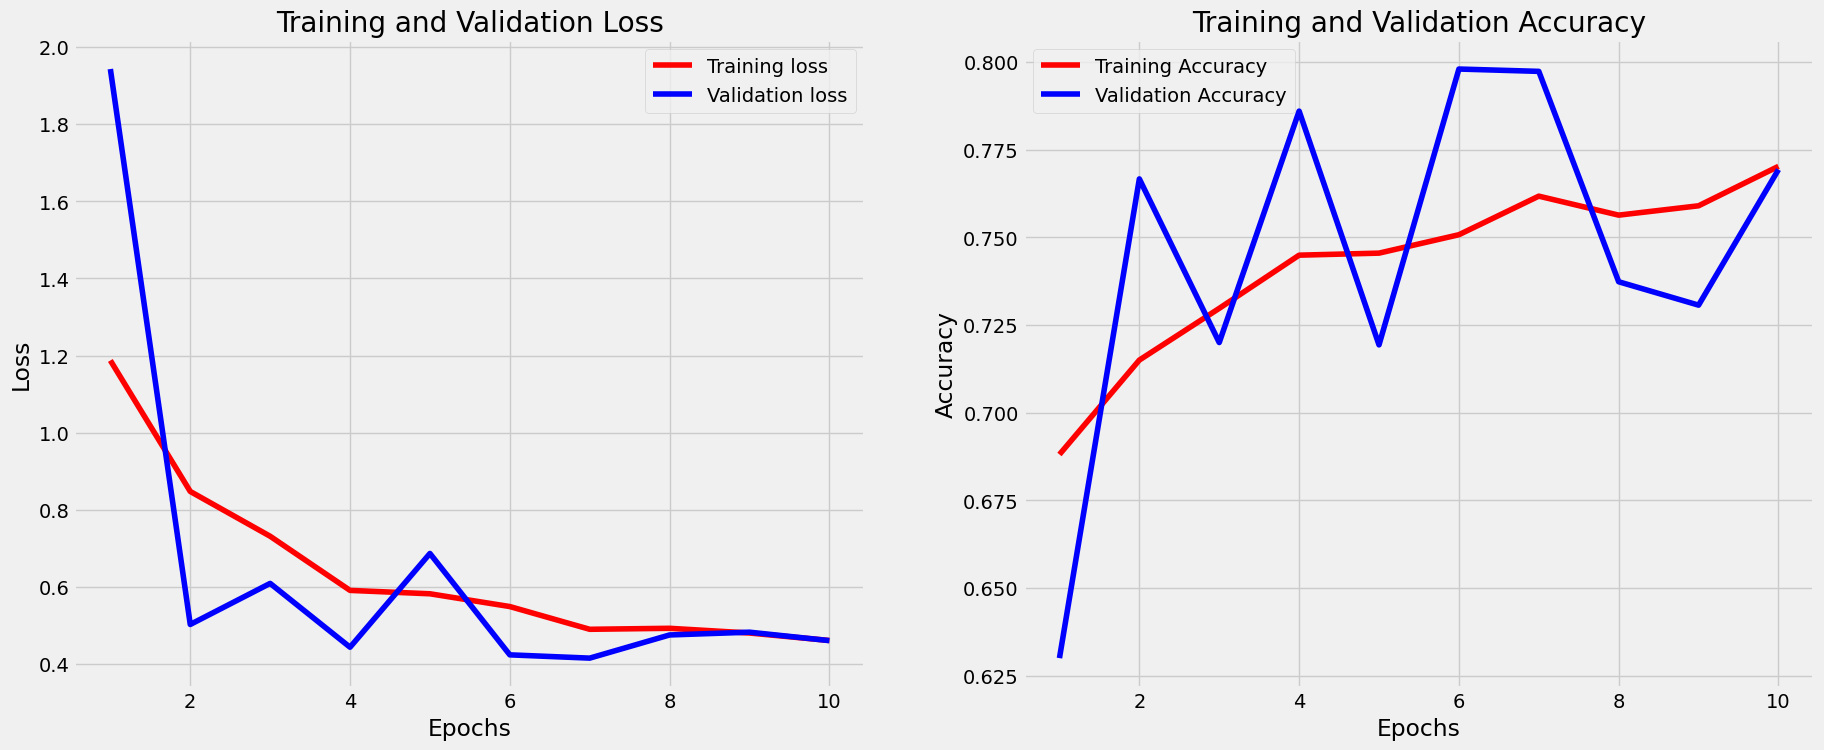

In [ ]:
model_performance(history1, 10)

In [15]:
model2 = Sequential()
model2.add(Input(shape=img_shape))
model2.add(Flatten())
model2.add(Dense(128, activation = 'relu'))
model2.add(Dense(64, activation = 'relu'))
model2.add(Dense(32, activation = 'relu'))
model2.add(Dense(class_counts, activation = 'softmax'))

model2.compile(Adamax(learning_rate= 0.001),loss = 'categorical_crossentropy', metrics = ['accuracy'] )

history2=model2.fit(train_gen, epochs= 10, verbose= 1, validation_data= valid_gen, shuffle= False)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


375/375 ━━━━━━━━━━━━━━━━━━━━ 68s 173ms/step - accuracy: 0.6350 - loss: 5.9343 - val_accuracy: 0.7667 - val_loss: 0.5335
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 58s 153ms/step - accuracy: 0.7327 - loss: 0.6543 - val_accuracy: 0.7253 - val_loss: 0.6353
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 59s 158ms/step - accuracy: 0.7250 - loss: 0.7293 - val_accuracy: 0.7300 - val_loss: 0.6824
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 82s 158ms/step - accuracy: 0.7495 - loss: 0.6319 - val_accuracy: 0.7013 - val_loss: 0.8192
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 57s 153ms/step - accuracy: 0.7303 - loss: 0.6552 - val_accuracy: 0.7253 - val_loss: 0.7360
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 59s 157ms/step - accuracy: 0.7378 - loss: 0.7265 - val_accuracy: 0.6847 - val_loss: 0.6731
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 56s 149ms/step - accuracy: 0.7700 - loss: 0.5146 - val_accuracy: 0.7587 - val_loss: 0.5567
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 63s 167ms/step - accuracy: 0.7469 - loss: 0.6497 - val

In [16]:
loss, accuracy = model2.evaluate(test_gen, verbose=0)
print(f'Model Accuracy : {round(accuracy*100)}%')
print(f'Model Loss : {round(loss*100)}%')

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Model Accuracy : 65%
Model Loss : 82%


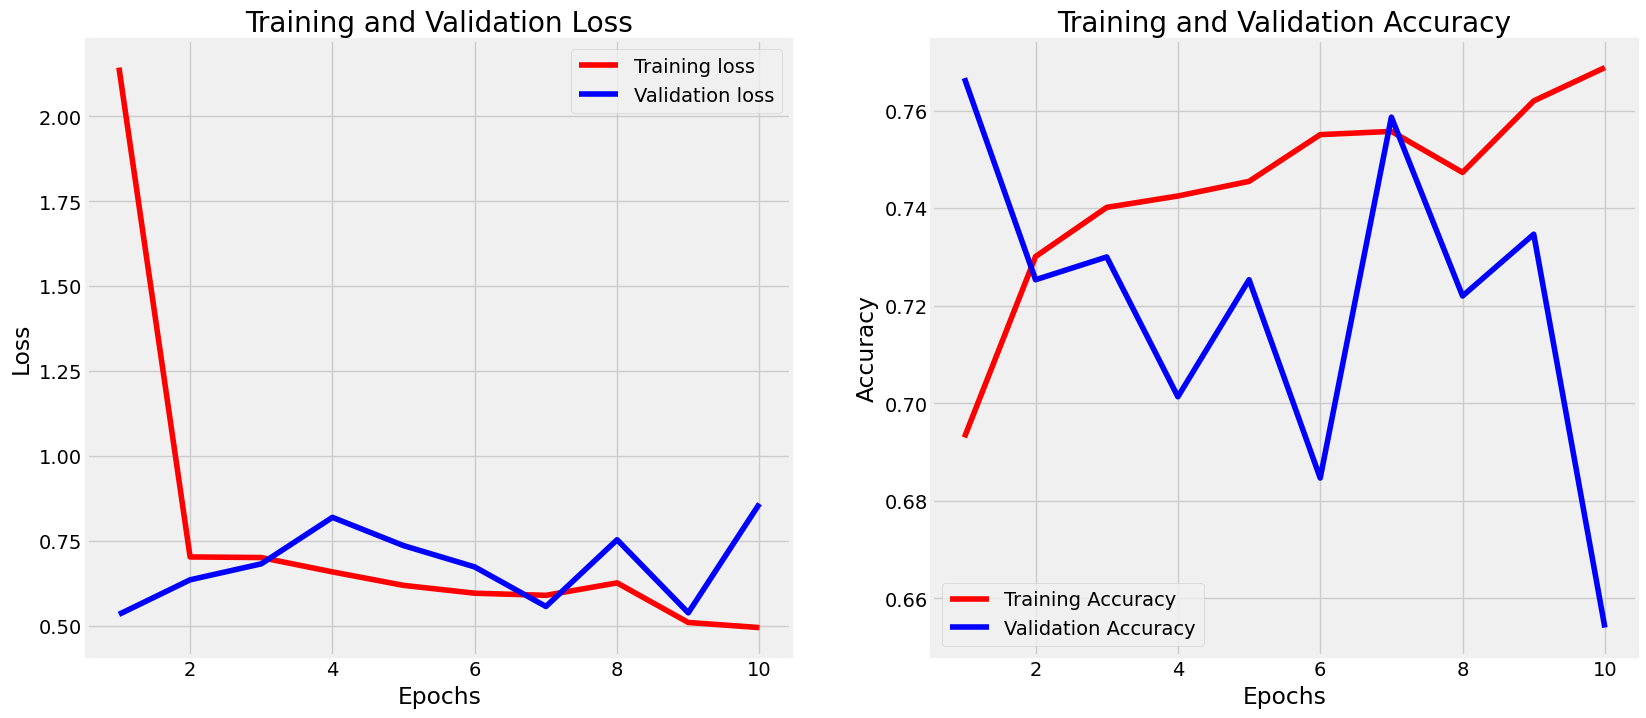

In [17]:
model_performance(history2, 10)

In [15]:
model4 = Sequential()
model4.add(Input(shape=img_shape))
model4.add(Flatten())
model4.add(Dense(256, activation = 'tanh'))
model4.add(Dense(128, activation = 'tanh'))
model4.add(Dense(64, activation = 'tanh'))
model4.add(Dense(class_counts, activation = 'softmax'))

model4.compile(Adamax(learning_rate= 0.001),loss = 'categorical_crossentropy', metrics = ['accuracy'] )

history4=model4.fit(train_gen, epochs= 10, verbose= 1, validation_data= valid_gen, shuffle= False)

Epoch 1/10
375/375 [==============================] - 419s 1s/step - loss: 0.6468 - accuracy: 0.6609 - val_loss: 0.5682 - val_accuracy: 0.6853
Epoch 2/10
261/375 [===================>..........] - ETA: 2:50 - loss: 0.5378 - accuracy: 0.6918

KeyboardInterrupt: 

In [ ]:
loss, accuracy = model4.evaluate(test_gen, verbose=0)
print(f'Model Accuracy : {round(accuracy*100)}%')
print(f'Model Loss : {round(loss*100)}%')

In [ ]:
model_performance(history2, 10)

In [20]:
# x_train, y_train = next(train_gen)
# x_val, y_val = next(valid_gen)

In [19]:
# def model_fn(x_train, y_train, x_val, y_val, params):
#     model = Sequential()
#     model.add(Input(shape=img_shape))
#     model.add(Flatten())
#     model.add(Dense(256, activation=params['activation']))
#     model.add(Dense(128, activation=params['activation']))
#     model.add(Dense(64, activation=params['activation']))
#     model.add(Dense(class_counts, activation='softmax'))

#     # Conditional loss function based on y_train shape
#     if params['loss'] == categorical_crossentropy and y_train.ndim == 1:
#         params['loss'] = sparse_categorical_crossentropy  # Switch to sparse if labels are not one-hot encoded
#     elif params['loss'] == sparse_categorical_crossentropy and y_train.ndim > 1:
#         params['loss'] = categorical_crossentropy  # Switch to categorical if labels are one-hot encoded

#     model.compile(
#         optimizer=params['optimizer'](learning_rate=params['learning_rate']),
#         loss=params['loss'],  # Use the potentially adjusted loss function
#         metrics=['accuracy']
#     )

#     history = model.fit(
#         x_train, y_train,
#         validation_data=(x_val, y_val),
#         epochs=params['epochs'],
#         verbose=0
#     )
#     print("\n\nHyperparameters:", params, "\n\n") # Add new lines before and after.
#     loss, accuracy = model.evaluate(x_val, y_val, verbose=0)
#     print(f'Validation Loss: {loss}')
#     print(f'Validation Accuracy: {accuracy}')
#     model_performance(history, params['epochs'])

#     return history, model

In [21]:
# param_grid = {
#     'activation': ['relu', 'tanh'],
#     'optimizer': [Adamax, Adam, SGD],
#     'learning_rate': [0.001, 0.01],
#     'loss': [categorical_crossentropy, sparse_categorical_crossentropy],
#     'epochs': [10, 20]
# }
# scan_object = talos.Scan(
#     x=x_train,
#     y=y_train,
#     x_val=x_val,
#     y_val=y_val,
#     model=model_fn,
#     params=param_grid,
#     experiment_name='hyperparameter_optimization',

# )

In [16]:
# r = talos.Analyze(scan_object)
# best_index = r.data['val_accuracy'].idxmax()
# best_params = r.data.loc[best_index].to_dict()  # Convert the row to a dictionary
# for param, value in best_params.items():
#     print(f"{param}: {value}")
# print("Best Parameters:", best_params)

In [18]:
!kaggle datasets download mysarahmadbhat/lung-cancer

Dataset URL: https://www.kaggle.com/datasets/mysarahmadbhat/lung-cancer
License(s): CC0-1.0
  0% 0.00/2.00k [00:00<?, ?B/s]
100% 2.00k/2.00k [00:00<00:00, 4.62MB/s]


In [19]:
!unzip lung-cancer.zip -d data

Archive:  lung-cancer.zip
  inflating: data/survey lung cancer.csv  


In [20]:
df = pd.read_csv('data/survey lung cancer.csv')

In [21]:
df.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [22]:
df.duplicated().sum()

33

In [23]:
# remove duplicated
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [24]:
df.head(10)

# we need convert gender to number and scale age value

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
5,F,75,1,2,1,1,2,2,2,2,1,2,2,1,1,YES
6,M,52,2,1,1,1,1,2,1,2,2,2,2,1,2,YES
7,F,51,2,2,2,2,1,2,2,1,1,1,2,2,1,YES
8,F,68,2,1,2,1,1,2,1,1,1,1,1,1,1,NO
9,M,53,2,2,2,2,2,1,2,1,2,1,1,2,2,YES


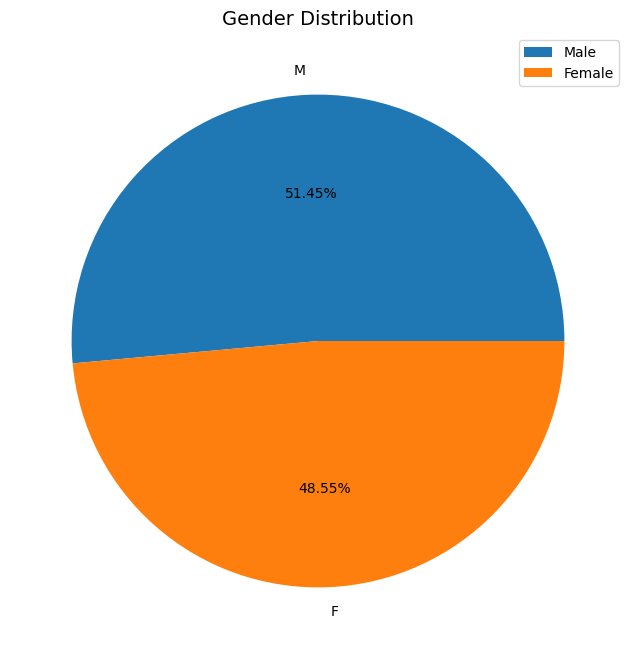

In [25]:
gen_count=df["GENDER"].value_counts()
plt.figure(figsize=(10,8))
values=gen_count.values
labels=gen_count.index
plt.pie(values,labels=labels,autopct='%1.2f%%')
plt.title("Gender Distribution",fontsize='14')
plt.legend(["Male","Female"])
plt.show()

Text(0.5, 1.0, 'Gender Vs. Lung Cancer')

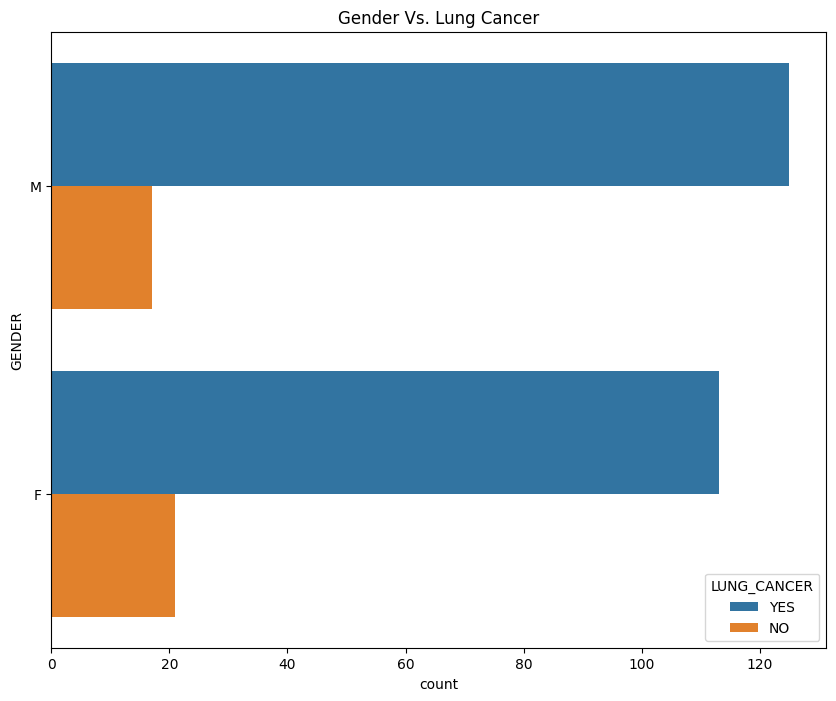

In [26]:
plt.figure(figsize=(10,8))
sns.countplot(data=df,y="GENDER",hue="LUNG_CANCER")
plt.title("Gender Vs. Lung Cancer")

In [27]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

df['GENDER'] = df['GENDER'].map({'F': 0, 'M': 1})

# scaler = MinMaxScaler()
# df['AGE'] = scaler.fit_transform(df[['AGE']])

df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [28]:
lung_key = {'YES' : 1, 'NO' : 0}

df['LUNG_CANCER'] = df['LUNG_CANCER'].map(lung_key)
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0


<Axes: >

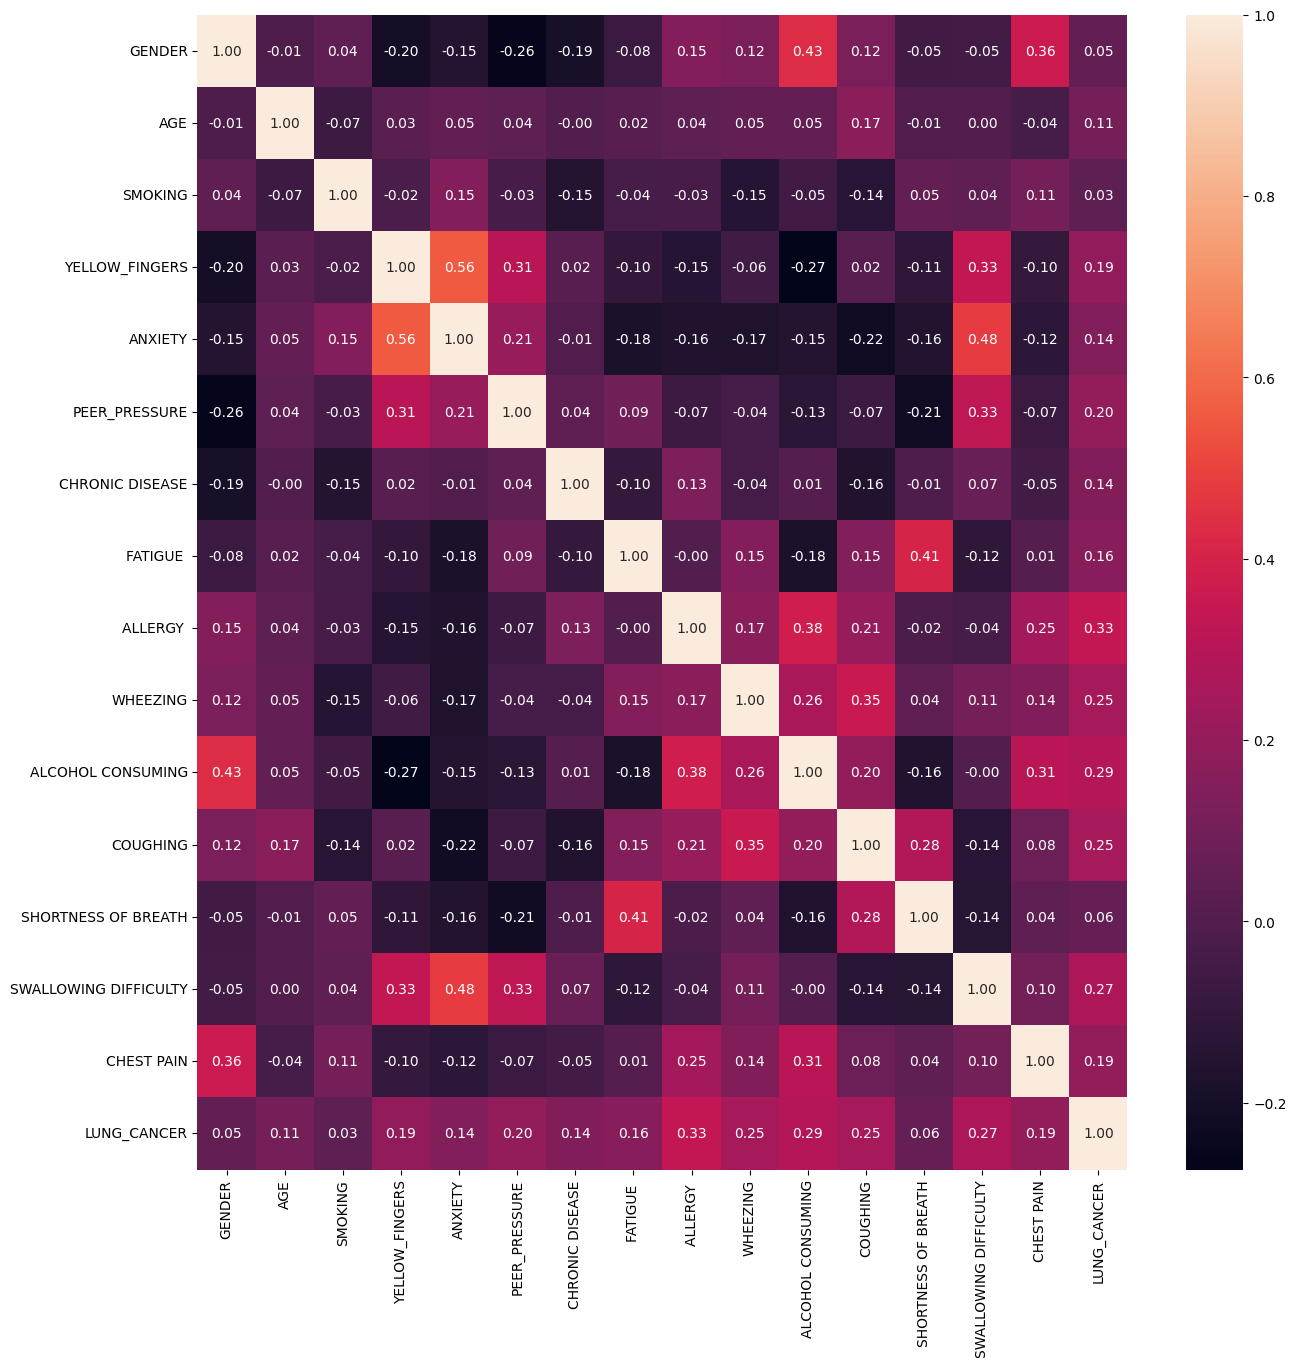

In [29]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True,fmt='0.2f')

In [30]:
# split data
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
y

array([1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1])

In [31]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [32]:
age_index = 1

X_train_age = X_train[:, age_index].reshape(-1, 1)
X_test_age = X_test[:, age_index].reshape(-1, 1)


In [33]:
X_train[:, age_index]

array([60, 38, 67, 55, 62, 59, 56, 65, 75, 77, 71, 66, 69, 62, 62, 73, 59,
       56, 68, 58, 71, 52, 62, 72, 52, 67, 74, 56, 55, 72, 73, 59, 47, 72,
       62, 55, 67, 64, 64, 77, 56, 55, 63, 57, 59, 78, 60, 59, 61, 76, 69,
       79, 55, 61, 54, 58, 71, 71, 61, 58, 55, 56, 65, 67, 62, 57, 75, 56,
       63, 72, 72, 67, 71, 67, 60, 74, 60, 59, 53, 64, 59, 63, 60, 70, 65,
       63, 64, 77, 63, 61, 87, 64, 44, 69, 64, 64, 56, 61, 64, 60, 60, 69,
       59, 54, 72, 59, 71, 69, 55, 63, 53, 56, 70, 63, 57, 56, 62, 70, 54,
       61, 59, 62, 68, 64, 74, 70, 64, 68, 68, 51, 47, 60, 78, 70, 54, 60,
       60, 67, 64, 48, 49, 68, 75, 52, 70, 64, 70, 63, 60, 49, 56, 74, 63,
       60, 60, 61, 58, 55, 59, 69, 51, 72, 74, 77, 68, 71, 81, 61, 54, 55,
       68, 58, 69, 67, 71, 57, 56, 67, 46, 67, 64, 77, 70, 68, 57, 53, 56,
       64, 64, 59, 51, 69, 77, 69, 59, 56, 47, 62, 70, 62, 59, 58, 64, 68,
       63, 70, 74, 76, 64, 81, 62, 70, 70, 60, 44, 55, 66, 49, 77, 72])

In [34]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

X_train_age_scaled = scaler.fit_transform(X_train_age)
X_test_age_scaled = scaler.transform(X_test_age)

X_train[:, age_index] = X_train_age_scaled.flatten()
X_test[:, age_index] = X_test_age_scaled.flatten()

In [35]:
X_train.shape

(220, 15)

In [45]:
def model_performance1(history, Epochs):
    # Define needed variables
    tr_acc = history.history['accuracy']
    tr_loss = history.history['loss']
    Epochs = [i+1 for i in range(len(tr_acc))]

    # Plot training history
    plt.figure(figsize= (20, 8))
    plt.style.use('fivethirtyeight')
    plt.subplot(1, 2, 1)
    plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
    plt.title('Training Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
    plt.title('Training Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout
    plt.show()

In [36]:
model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))
model.add(Dense(6, activation = 'relu'))
model.add(Dense(3, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'sgd', metrics = ['accuracy'] )

history=model.fit(X_train,y_train, epochs= 10, batch_size = 4)

Epoch 1/10
55/55 [==============================] - 1s 2ms/step - loss: 0.4471 - accuracy: 0.8818
Epoch 2/10
55/55 [==============================] - 0s 2ms/step - loss: 0.3483 - accuracy: 0.8818
Epoch 3/10
55/55 [==============================] - 0s 2ms/step - loss: 0.3396 - accuracy: 0.8818
Epoch 4/10
55/55 [==============================] - 0s 2ms/step - loss: 0.3378 - accuracy: 0.8818
Epoch 5/10
55/55 [==============================] - 0s 2ms/step - loss: 0.3361 - accuracy: 0.8818
Epoch 6/10
55/55 [==============================] - 0s 2ms/step - loss: 0.3353 - accuracy: 0.8818
Epoch 7/10
55/55 [==============================] - 0s 3ms/step - loss: 0.3350 - accuracy: 0.8818
Epoch 8/10
55/55 [==============================] - 0s 2ms/step - loss: 0.3324 - accuracy: 0.8818
Epoch 9/10
55/55 [==============================] - 0s 2ms/step - loss: 0.3315 - accuracy: 0.8818
Epoch 10/10
55/55 [==============================] - 0s 2ms/step - loss: 0.3302 - accuracy: 0.8818


In [41]:
loss, accuracy = model.evaluate(X_test,y_test, verbose=0)
print(f'Model Accuracy : {round(accuracy*100)}%')
print(f'Model Loss : {round(loss*100)}%')

Model Accuracy : 79%
Model Loss : 50%


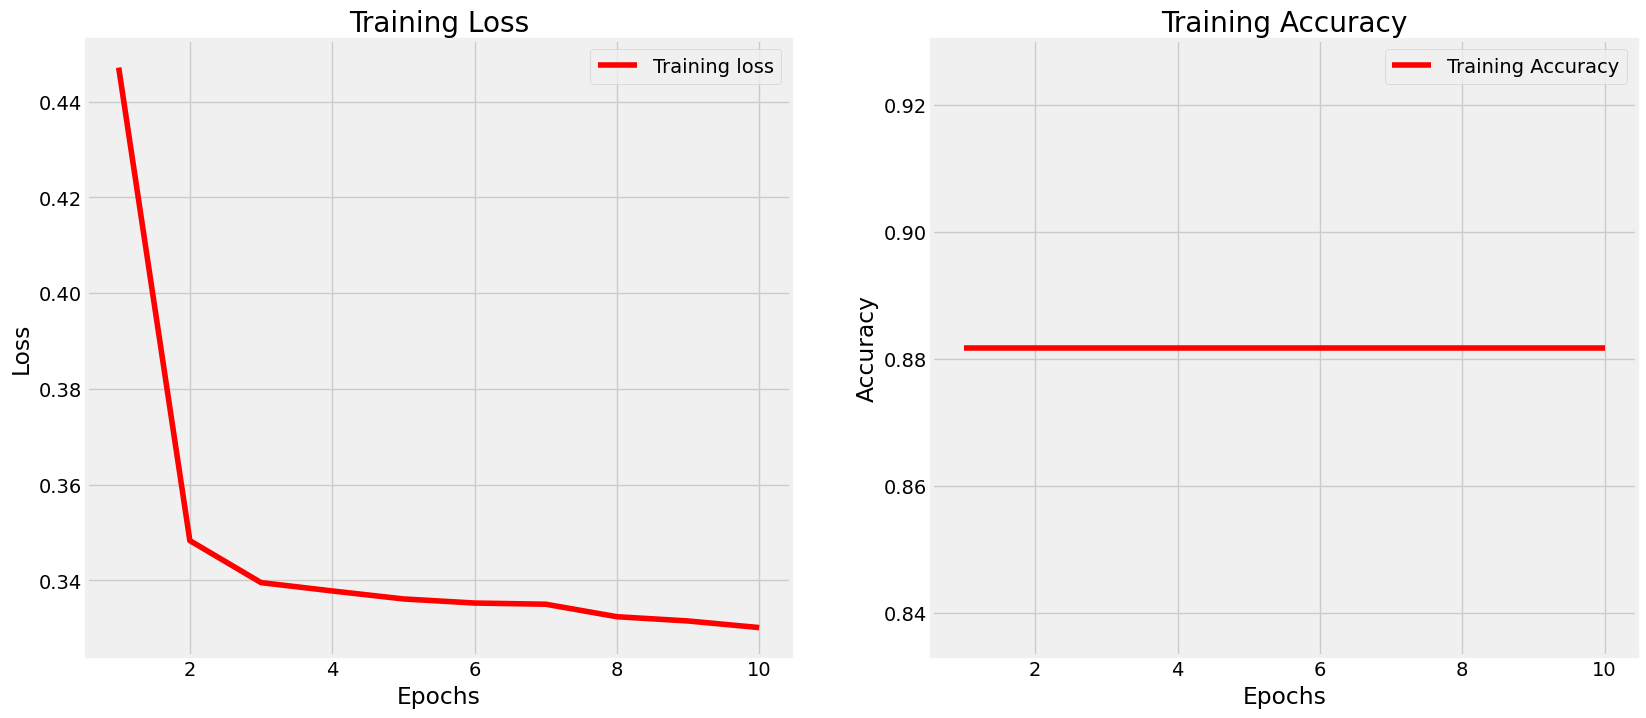

In [46]:
model_performance1(history, 10)

In [39]:
model1 = Sequential()
model1.add(Input(shape=(X_train.shape[1],)))
model1.add(Dense(10, activation = 'relu'))
model1.add(Dropout(0.2))
model1.add(Dense(5, activation = 'relu'))
model1.add(Dense(1, activation = 'sigmoid'))

model1.compile(loss = 'binary_crossentropy', optimizer = 'sgd', metrics = ['accuracy'] )

history1=model1.fit(X_train,y_train, epochs= 10,batch_size = 4)

Epoch 1/10
55/55 [==============================] - 1s 2ms/step - loss: 0.5615 - accuracy: 0.6955
Epoch 2/10
55/55 [==============================] - 0s 2ms/step - loss: 0.3786 - accuracy: 0.8636
Epoch 3/10
55/55 [==============================] - 0s 2ms/step - loss: 0.3765 - accuracy: 0.8818
Epoch 4/10
55/55 [==============================] - 0s 2ms/step - loss: 0.3514 - accuracy: 0.8818
Epoch 5/10
55/55 [==============================] - 0s 2ms/step - loss: 0.3546 - accuracy: 0.8818
Epoch 6/10
55/55 [==============================] - 0s 2ms/step - loss: 0.3655 - accuracy: 0.8818
Epoch 7/10
55/55 [==============================] - 0s 3ms/step - loss: 0.3609 - accuracy: 0.8818
Epoch 8/10
55/55 [==============================] - 0s 2ms/step - loss: 0.3504 - accuracy: 0.8773
Epoch 9/10
55/55 [==============================] - 0s 2ms/step - loss: 0.3439 - accuracy: 0.8773
Epoch 10/10
55/55 [==============================] - 0s 2ms/step - loss: 0.3549 - accuracy: 0.8818


In [40]:
loss, accuracy = model1.evaluate(X_test,y_test, verbose=0)
print(f'Model Accuracy : {round(accuracy*100)}%')
print(f'Model Loss : {round(loss*100)}%')

Model Accuracy : 79%
Model Loss : 49%


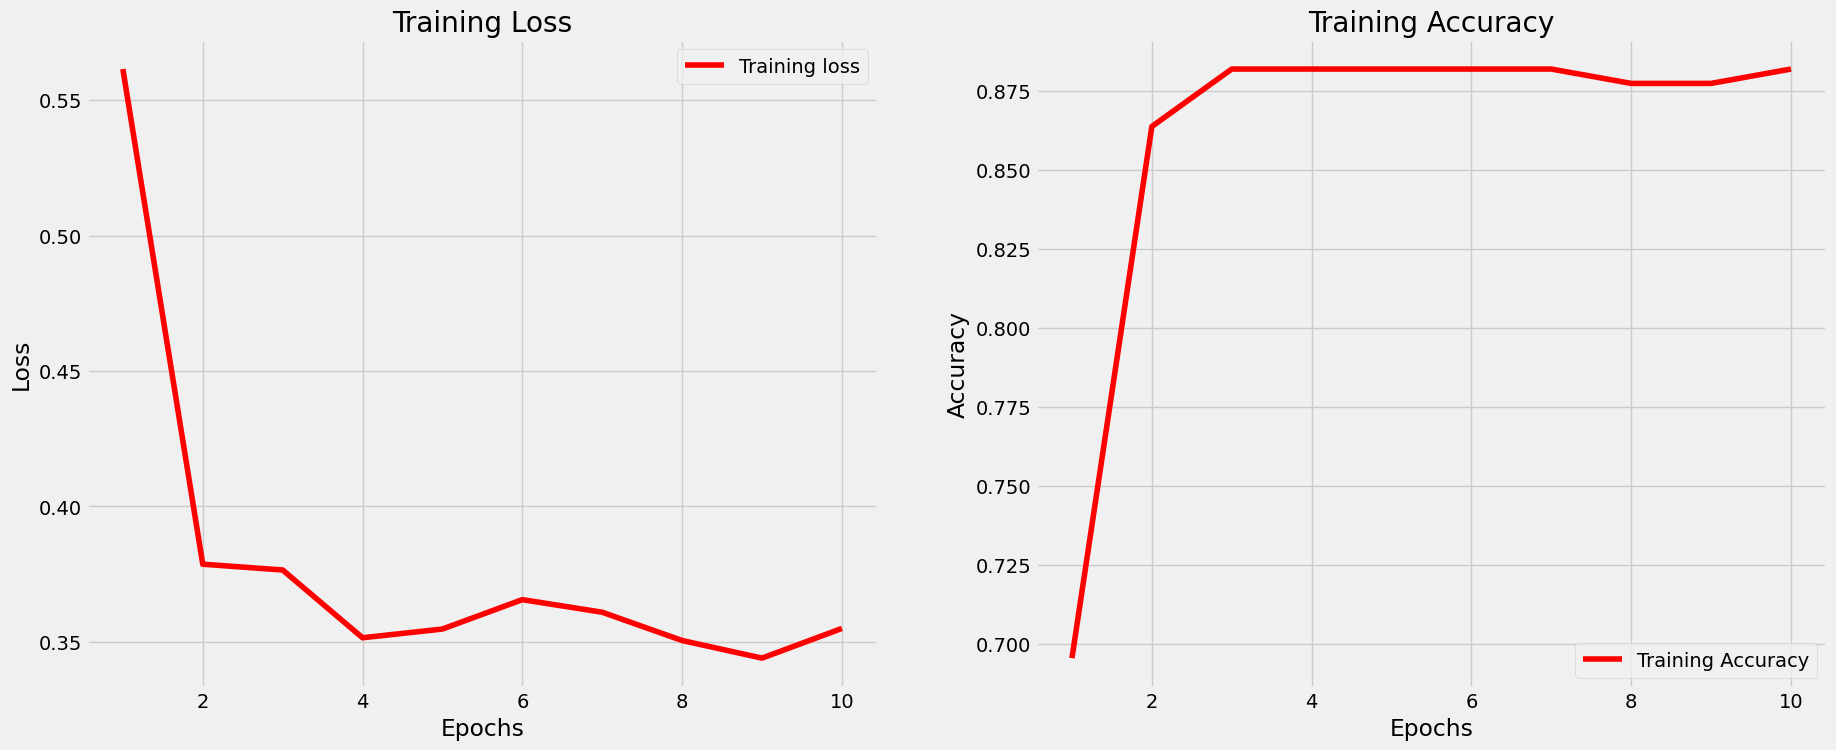

In [47]:
model_performance1(history1, 10)